In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [4]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [5]:
# A scaler would be useful because the range for loan status is 0-1 and the range for 
# some other columns (e.g. total debt) is up to the 10s of thousands

In [6]:
corrs = df.corr()
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

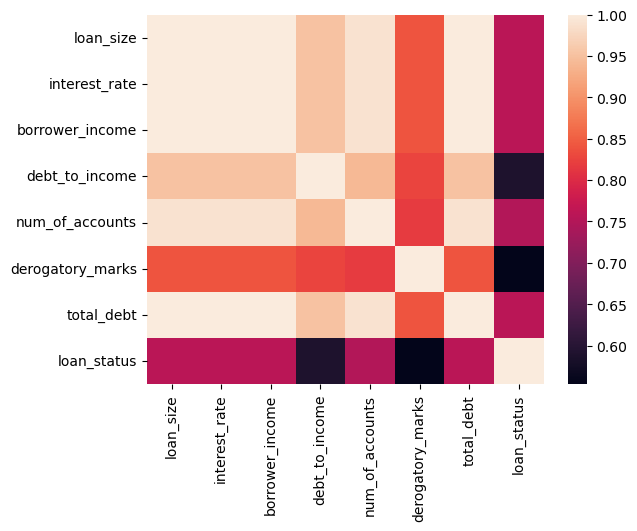

In [7]:
sns.heatmap(corrs)
plt.show

In [8]:
# According to the heat map and .corr(), there is multicollinearity among many of the columns

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [11]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df.loan_status

# Separate the X variable, the features
X = df.drop("loan_status", axis=1)

In [13]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [14]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [15]:
# Check the balance of our target values
df.loan_status.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [16]:
# According to the value_count above, there is a large imbalance here. 
# Our amount of "high risk loans" (1) is much lower than the amount of "healthy loans" (0).

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [17]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

print(X_train.shape)
print(X_test.shape)

(58152, 7)
(19384, 7)


---

## Create a Logistic Regression Model with the Original Data

In [18]:
# This was built in class
def doClassification(model, X_train, X_test, y_train, y_test):
    # predict
    train_preds = model.predict(X_train)
    train_probs = model.predict_proba(X_train)

    test_preds = model.predict(X_test)
    test_probs = model.predict_proba(X_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix: 
    {train_cm}

    Train Report: 
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix: 
    {test_cm}

    Test Report: 
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [20]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr = LogisticRegression(random_state=1)

# Fit the model using training data
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [21]:
# Make a prediction using the testing data
train_preds = lr.predict(X_train)
train_probs = lr.predict_proba(X_train)

test_preds = lr.predict(X_test)
test_probs = lr.predict_proba(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

TRAINING METRICS

Train Confusion Matrix: 
[[55958   286]
 [  184  1724]]

Train Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56244
           1       0.86      0.90      0.88      1908

    accuracy                           0.99     58152
   macro avg       0.93      0.95      0.94     58152
weighted avg       0.99      0.99      0.99     58152





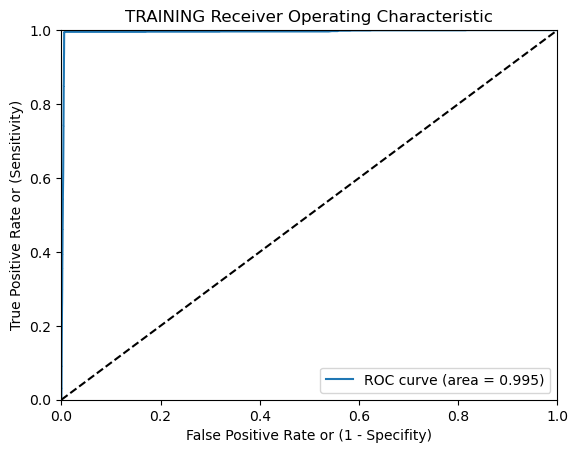



TESTING METRICS

Test Confusion Matrix: 
[[18699    93]
 [   53   539]]

Test Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384





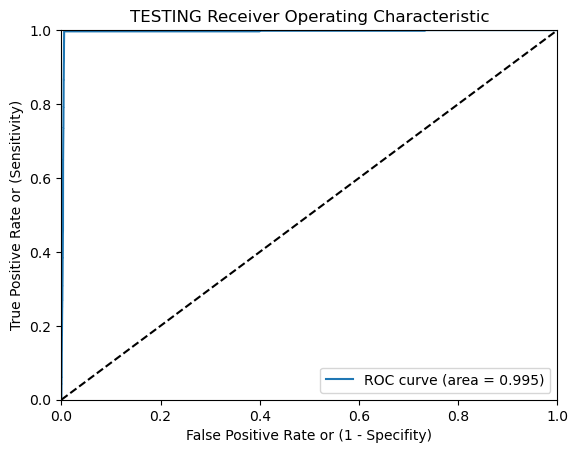

In [22]:
# Generate a confusion matrix for the model
# Print the classification report for the model

# evaluate train
train_cr = classification_report(y_train, train_preds)
train_cm = confusion_matrix(y_train, train_preds)

train_report = f"""
Train Confusion Matrix: 
{train_cm}

Train Report: 
{train_cr}
"""
print("TRAINING METRICS")
print(train_report)
print()

# train ROC curve
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
roc_auc = roc_auc_score(y_train, train_probs[:,1])

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('TRAINING Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print()
print()

# evaluate test
test_cr = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)

test_report = f"""
Test Confusion Matrix: 
{test_cm}

Test Report: 
{test_cr}
"""
print("TESTING METRICS")
print(test_report)
print()

# train ROC curve
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
roc_auc = roc_auc_score(y_test, test_probs[:,1])

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('TESTING Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** There are no signs of overfitting, but the false positives and false negatives are both high. We should keep trying for a better model.

---

In [23]:
# Support Vector Machine

TRAINING METRICS

    Train Confusion Matrix: 
    [[55931   313]
 [   16  1892]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56244
           1       0.86      0.99      0.92      1908

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    



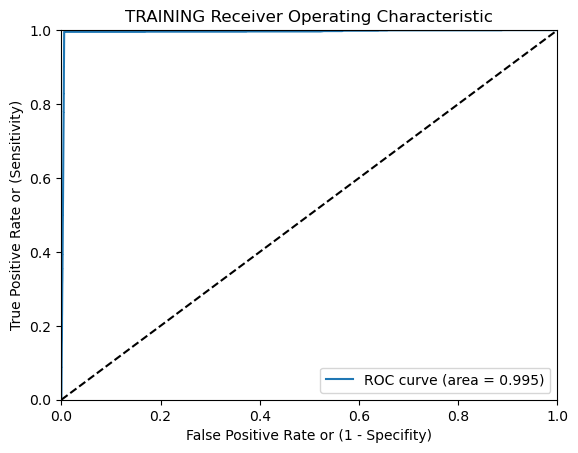



TESTING METRICS

    Test Confusion Matrix: 
    [[18689   103]
 [    4   588]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.85      0.99      0.92       592

    accuracy                           0.99     19384
   macro avg       0.93      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384

    



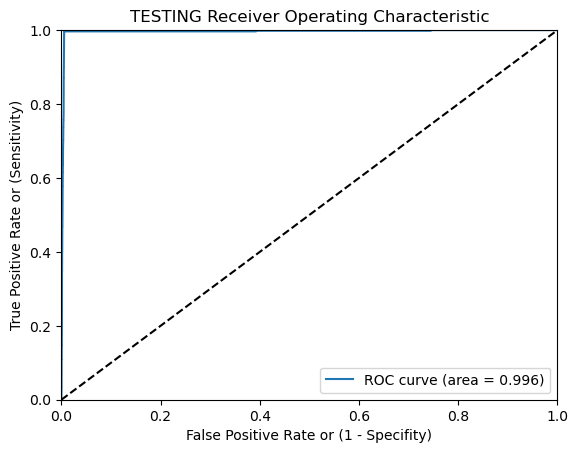

In [24]:
# initialize
sv = SVC(probability=True)

# fit
sv.fit(X_train, y_train)

doClassification(sv, X_train, X_test, y_train, y_test)

In [25]:
# Still no overfitting and we reduced the false positives, but we increased false negatives. We can do better.

In [26]:
# K-Nearest Neighbor

TRAINING METRICS

    Train Confusion Matrix: 
    [[55946   298]
 [   22  1886]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56244
           1       0.86      0.99      0.92      1908

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    



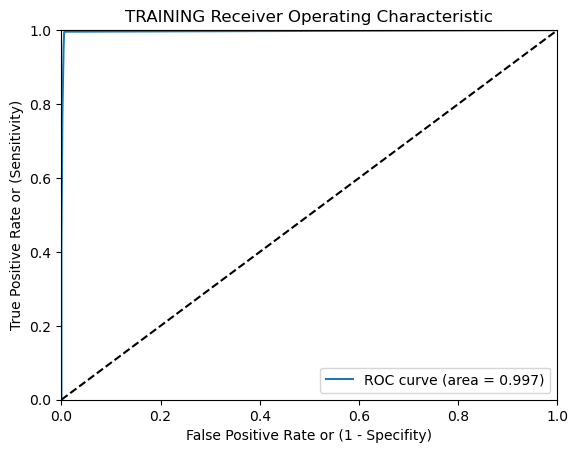



TESTING METRICS

    Test Confusion Matrix: 
    [[18687   105]
 [    8   584]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.85      0.99      0.91       592

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    



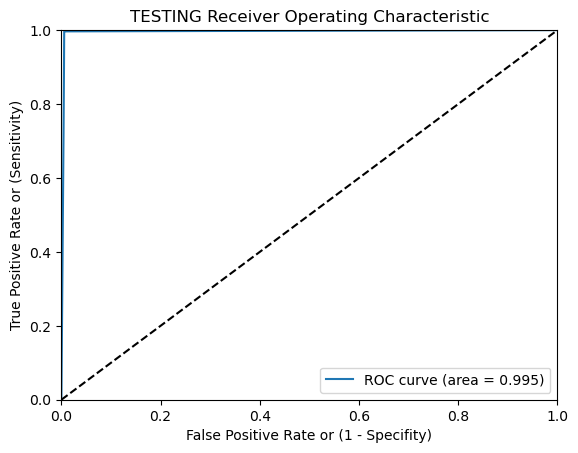

In [27]:
 # initialize
knn = KNeighborsClassifier(n_neighbors=7)

# fit
knn.fit(X_train, y_train)

doClassification(knn, X_train, X_test, y_train, y_test)

In [28]:
# No overfitting and the number of false negatives was reduced
# Better explainability than the support vector machines, so this is the best model so far.

In [29]:
# Decision Tree

TRAINING METRICS

    Train Confusion Matrix: 
    [[56176    68]
 [   95  1813]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56244
           1       0.96      0.95      0.96      1908

    accuracy                           1.00     58152
   macro avg       0.98      0.97      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    



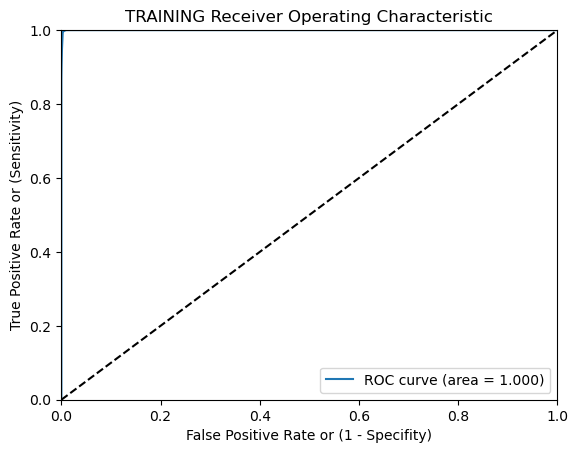



TESTING METRICS

    Test Confusion Matrix: 
    [[18703    89]
 [   86   506]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       0.85      0.85      0.85       592

    accuracy                           0.99     19384
   macro avg       0.92      0.92      0.92     19384
weighted avg       0.99      0.99      0.99     19384

    



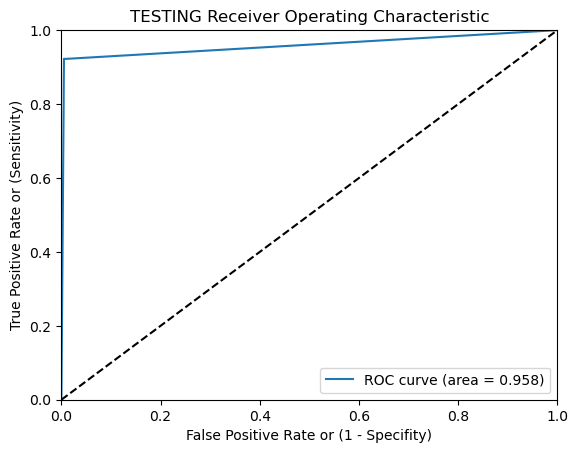

In [30]:
 # initialize
dt = DecisionTreeClassifier(random_state=42)

# fit
dt.fit(X_train, y_train)

doClassification(dt, X_train, X_test, y_train, y_test)

In [31]:
# This one has signs of overfitting and the metrics are worse than our KNN model.

In [32]:
# Random Forest

TRAINING METRICS

    Train Confusion Matrix: 
    [[56114   130]
 [   34  1874]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56244
           1       0.94      0.98      0.96      1908

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    



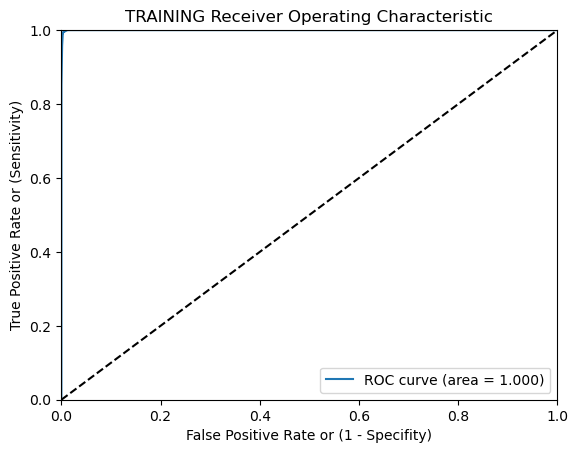



TESTING METRICS

    Test Confusion Matrix: 
    [[18696    96]
 [   59   533]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.85      0.90      0.87       592

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.93     19384
weighted avg       0.99      0.99      0.99     19384

    



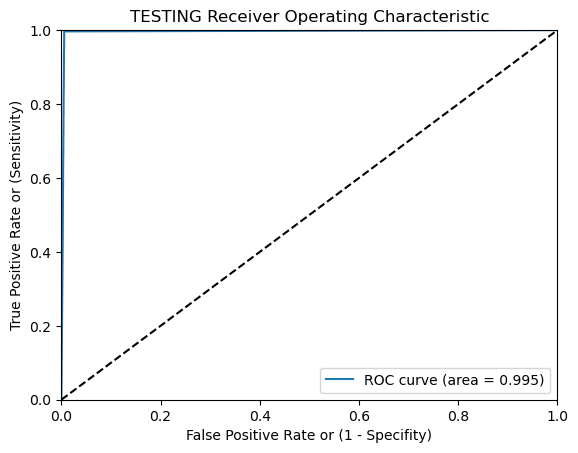

In [33]:
 # initialize
rf = RandomForestClassifier(random_state=42)

# fit
rf.fit(X_train, y_train)

doClassification(rf, X_train, X_test, y_train, y_test)

In [34]:
# Slight overfitting and the recall is worse than KNN.

In [35]:
# AdaBoost

TRAINING METRICS

    Train Confusion Matrix: 
    [[55930   314]
 [   11  1897]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56244
           1       0.86      0.99      0.92      1908

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    



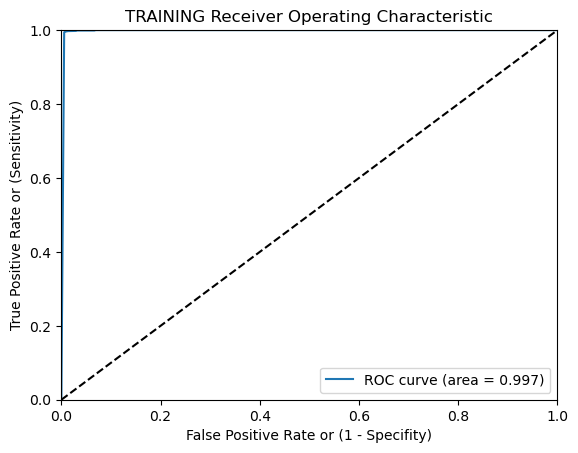



TESTING METRICS

    Test Confusion Matrix: 
    [[18687   105]
 [    2   590]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.85      1.00      0.92       592

    accuracy                           0.99     19384
   macro avg       0.92      1.00      0.96     19384
weighted avg       1.00      0.99      0.99     19384

    



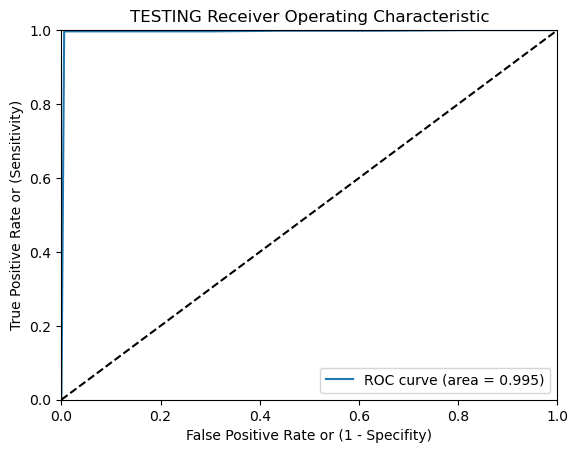

In [36]:
# initialize
ada = AdaBoostClassifier(random_state=42)

# fit
ada.fit(X_train, y_train)

doClassification(ada, X_train, X_test, y_train, y_test)

In [37]:
# No overfitting, same FP as KNN, fewer FN than KNN, so this is now the model to beat.

In [38]:
# Gradient Boost

TRAINING METRICS

    Train Confusion Matrix: 
    [[55952   292]
 [   10  1898]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     56244
           1       0.87      0.99      0.93      1908

    accuracy                           0.99     58152
   macro avg       0.93      0.99      0.96     58152
weighted avg       1.00      0.99      0.99     58152

    



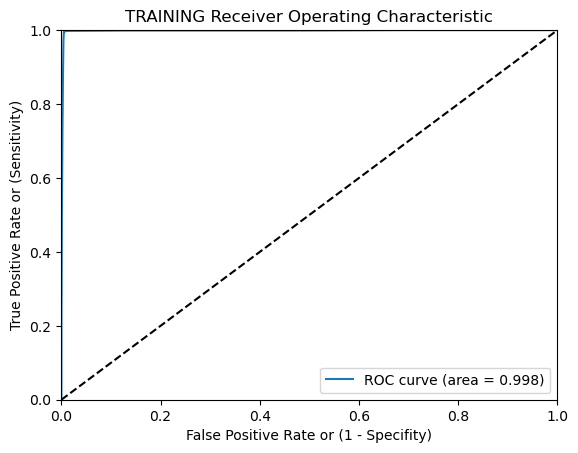



TESTING METRICS

    Test Confusion Matrix: 
    [[18689   103]
 [   12   580]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.85      0.98      0.91       592

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

    



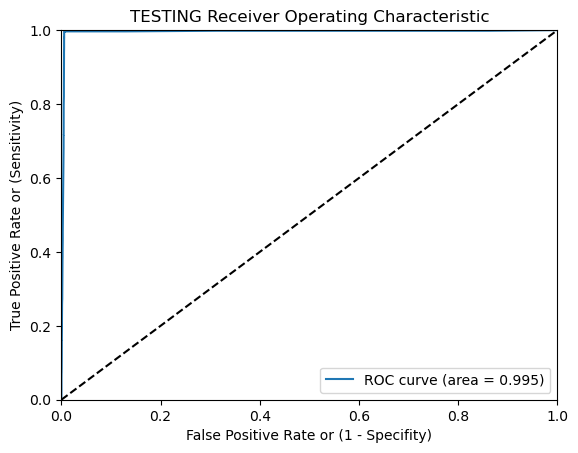

In [39]:
# initialize
gb = GradientBoostingClassifier(random_state=42)

# fit
gb.fit(X_train, y_train)

doClassification(gb, X_train, X_test, y_train, y_test)

In [40]:
# No overfitting, fewer FP but a few more FN